In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

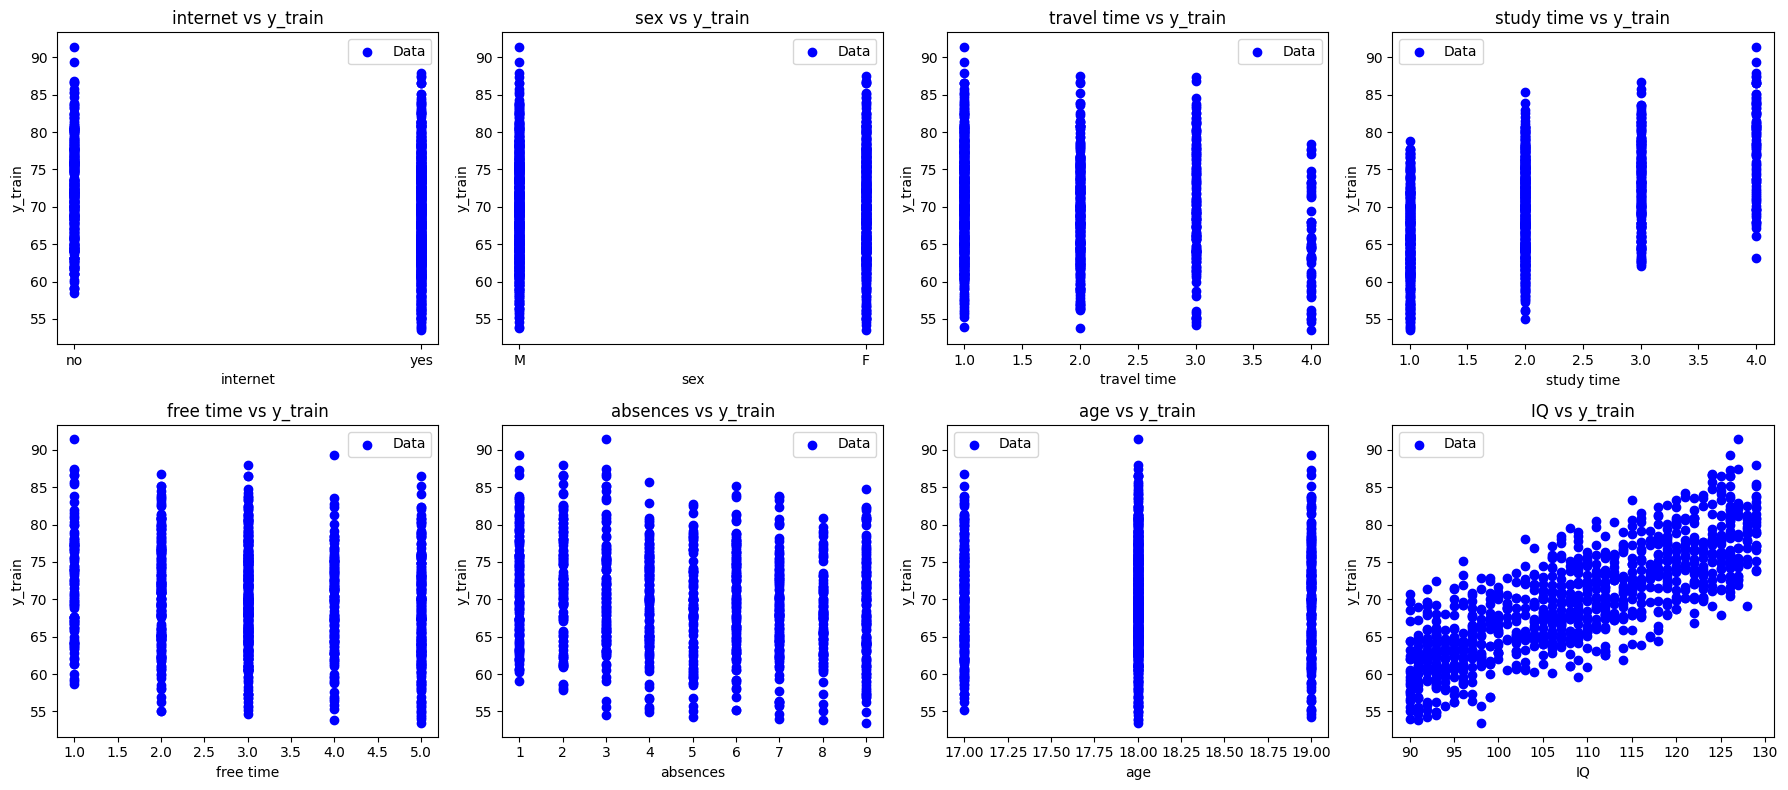

In [80]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Feature names
feature_names = ['internet', 'sex', 'travel time', 'study time', 'free time', 'absences', 'age', 'IQ']
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

# Try plotting y_train with different features
for i in range(x_train.shape[1]):
    ax = axes[i // 4, i % 4]
    #ax = axes[i]
    feature = x_train[:, i]

    # Scatter plot and trend line
    ax.scatter(feature, y_train, color='blue', label='Data')

    # Add title and labels
    ax.set_title(f'{feature_names[i]} vs y_train')
    ax.set_xlabel(f'{feature_names[i]}')
    ax.set_ylabel('y_train')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x):
  # ---------
    # Your code here
    le = LabelEncoder()
    x = le.fit_transform(x)
    return x


In [81]:
def z_score(x_train):

  # ---------
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    return x_train, x_std, x_mean

  # ---------

    return x_train,x_std,x_mean



In [82]:
# Cost function using Normalized Root Mean Square Error (NRMSE) with L2 regularization
def cost(x_train, y_train, w, b, lambda_reg=0.01):
    y_pred = np.dot(x_train, w) + b
    nrmse = np.sqrt(np.sum((y_train - y_pred) ** 2) / len(y_train)) / np.std(y_train)
    l2_reg = lambda_reg * np.sum(w**2)
    return nrmse + l2_reg
    # Use mean square error as cost function
    # return cost
  # ---------

In [83]:

def gradient_descent(x_train, y_train, w, b, lambda_reg=0.01):
    learning_rate = 0.001
    dy = np.dot(x_train, w) + b - y_train
    w_gradient = np.dot(x_train.T, dy) + lambda_reg * w
    b_gradient = np.sum(dy)
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient
    return w, b


In [85]:
x_train[:, 0] = feature_changing(x_train[:, 0])  # 'internet'
x_train[:, 1] = feature_changing(x_train[:, 1])  # 'sex'
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)
# Train the model using gradient descent
old_cost = float('inf')
while abs(old_cost - cost(x_train, y_train, w, b)) > 0.00001:
    old_cost = cost(x_train, y_train, w, b)
    w, b = gradient_descent(x_train, y_train, w, b)

print(f"w : {w}")
print(f"b : {b}")
print(f"cost : {cost(x_train, y_train, w, b)}")

# Load the test data
x_predict = pd.read_excel('Test data.xlsx').iloc[:, :8].to_numpy()
x_predict[:, 0] = feature_changing(x_predict[:, 0])
x_predict[:, 1] = feature_changing(x_predict[:, 1])
x_predict = (x_predict - x_mean) / x_std
print(f"x predict : {x_predict}")
ans = pd.read_excel('Test data.xlsx').iloc[:, 8].to_numpy().reshape(-1, 1)

# Predict and calculate accuracy
y_predict = np.dot(x_predict, w) + b
print(f"y predicted for test data : {y_predict}")
print(f"cost for predicted set: {cost(x_predict, ans, w, b)}")

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5:  # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy * 100 / 200.0, 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

w : [[-1.39691791e+00]
 [-1.99382240e-05]
 [-8.99553858e-01]
 [ 3.46042274e+00]
 [-1.26809510e+00]
 [-1.47711995e+00]
 [ 1.63821315e-01]
 [ 5.35128003e+00]]
b : [69.95699]
cost : 0.4723565360048163
x predict : [[0.6828438033870167 -1.1679324440452141 -0.824731623230878 ...
  0.00037553142733411825 0.033180738485371154 0.42756308052321185]
 [-1.4644637544337908 -1.1679324440452141 1.3982646658011382 ...
  0.00037553142733411825 1.6132159044553664 -1.0337502224310697]
 [-1.4644637544337908 0.8562139061198019 0.2867665212851301 ...
  0.7514383860953198 0.033180738485371154 0.42756308052321185]
 ...
 [-1.4644637544337908 -1.1679324440452141 -0.824731623230878 ...
  0.7514383860953198 0.033180738485371154 0.08372465629867504]
 [0.6828438033870167 -1.1679324440452141 2.509762810317146 ...
  0.00037553142733411825 0.033180738485371154 0.42756308052321185]
 [0.6828438033870167 -1.1679324440452141 0.2867665212851301 ...
  -0.3751558959066587 -1.546854427484624 1.6309975653090907]]
y predicted f